# Classification with Random Forests

### Imports

In [8]:
import sklearn
from sklearn import datasets
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

### Load Data

In [9]:
df = pd.read_csv('../../data/01-modified-data/occupations_detailed_(employment_and_wage).csv')

## drop unneeded column created from read_csv
df = df.iloc[:, 1:]

### Separate Predictor and Response Variables

In [10]:
# Y="Target" COLUMN and X="everything else"
X = df.iloc[:, 2:6]
Y = df.iloc[:, 7]

### Normalization

In [11]:
X=0.1+(X-np.min(X,axis=0))/(np.max(X,axis=0)-np.min(X,axis=0))

### Numerical EDA

In [12]:
df['Target'].value_counts(ascending=True)

Legal Occupations                                              15
Building and Grounds Cleaning and Maintenance Occupations      18
Farming, Fishing, and Forestry Occupations                     24
Community and Social Service Occupations                       26
Healthcare Support Occupations                                 27
Food Preparation and Serving Related Occupations               33
Computer and Mathematical Occupations                          36
Sales and Related Occupations                                  42
Protective Service Occupations                                 43
Arts, Design, Entertainment, Sports, and Media Occupations     55
Business and Financial Operations Occupations                  58
Personal Care and Service Occupations                          60
Architecture and Engineering Occupations                       61
Management Occupations                                         73
Installation, Maintenance, and Repair Occupations              75
Life, Phys

In [13]:
corr = X.corr()
print(corr)	

            TOT_EMP  EMP_PRSE    A_MEAN  MEAN_PRSE
TOT_EMP    1.000000 -0.235767 -0.072640  -0.190195
EMP_PRSE  -0.235767  1.000000  0.115099   0.801454
A_MEAN    -0.072640  0.115099  1.000000   0.158494
MEAN_PRSE -0.190195  0.801454  0.158494   1.000000


### Correlation Matrix Heatmap

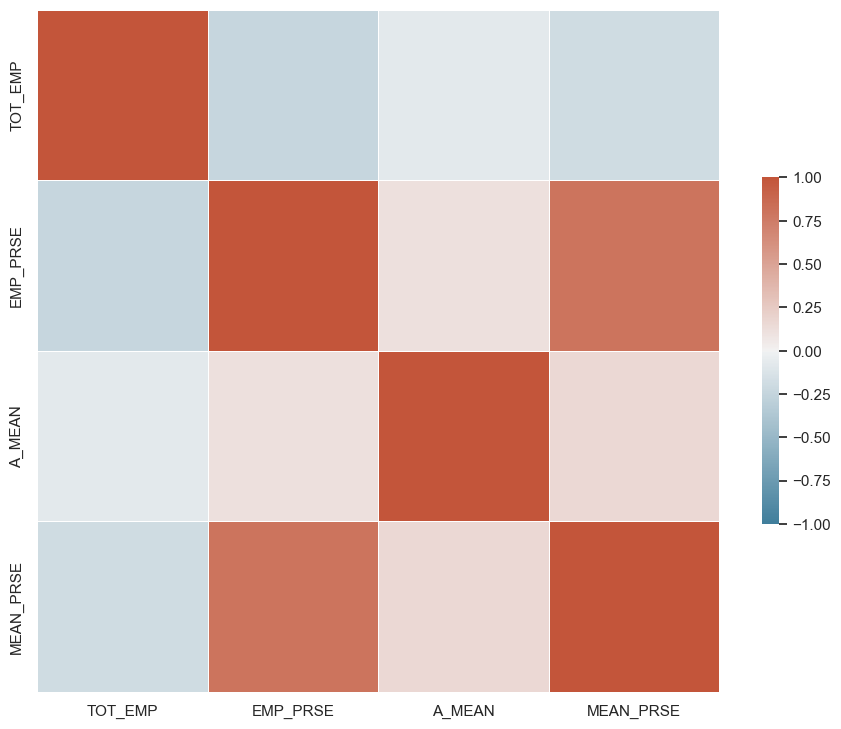

In [14]:
sns.set_theme(style="white")
f, ax = plt.subplots(figsize=(11, 9))  # Set up the matplotlib figure
cmap = sns.diverging_palette(230, 20, as_cmap=True) 	# Generate a custom diverging colormap
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,  cmap=cmap, vmin=-1, vmax=1, center=0,
        square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show();

### Multivariable Pair Plot

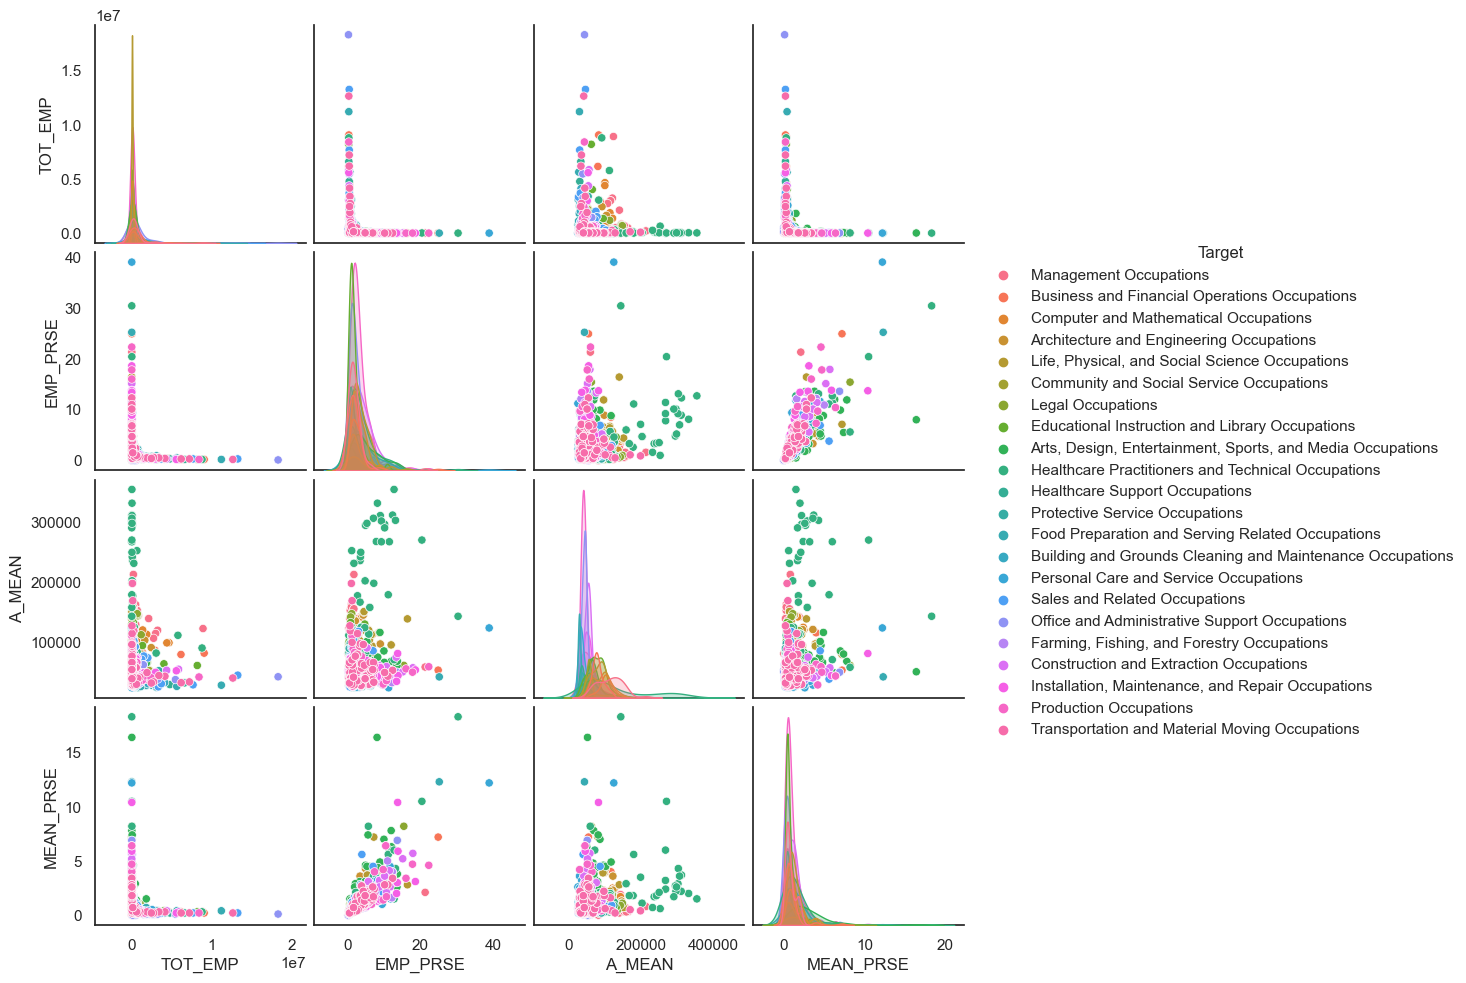

In [15]:
sns.pairplot(df.iloc[:, 2:7], hue='Target')
plt.show()

### Baseline: Random Classifier

In [16]:
from collections import Counter
from sklearn.metrics import precision_recall_fscore_support
def random_classifier(y_data):
    ypred=[];
    max_label=np.max(y_data); #print(max_label)
    for i in range(0,len(y_data)):
        ypred.append(int(np.floor((max_label+1)*np.random.uniform(0,1))))

    print("-----RANDOM CLASSIFIER-----")
    print("count of prediction:",Counter(ypred).values()) # counts the elements' frequency
    print("probability of prediction:",np.fromiter(Counter(ypred).values(), dtype=float)/len(y_data)) # counts the elements' frequency
    print("accuracy",accuracy_score(y_data, ypred))
    print("precision, recall, fscore,",precision_recall_fscore_support(y_data, ypred))
random_classifier(Y)


-----RANDOM CLASSIFIER-----
count of prediction: dict_values([75, 54, 61, 65, 59, 69, 63, 58, 56, 68, 80, 69, 49, 52, 54, 81, 53, 59, 50, 59, 60, 59, 41])
probability of prediction: [0.05380201 0.03873745 0.04375897 0.04662841 0.04232425 0.04949785
 0.04519369 0.04160689 0.04017217 0.04878049 0.05738881 0.04949785
 0.03515065 0.03730273 0.03873745 0.05810617 0.03802009 0.04232425
 0.03586801 0.04232425 0.04304161 0.04232425 0.02941176]
accuracy 0.04375896700143472
precision, recall, fscore, (array([0.        , 0.07407407, 0.04411765, 0.04347826, 0.02439024,
       0.0754717 , 0.        , 0.01234568, 0.07246377, 0.04      ,
       0.03174603, 0.01785714, 0.03389831, 0.08196721, 0.01694915,
       0.0125    , 0.01666667, 0.04615385, 0.03703704, 0.11864407,
       0.05172414, 0.15254237, 0.        ]), array([0.        , 0.05479452, 0.05172414, 0.08333333, 0.01639344,
       0.05063291, 0.        , 0.06666667, 0.05154639, 0.05454545,
       0.01960784, 0.03703704, 0.04651163, 0.15151515, 0

c:\Users\Eric\anaconda3\envs\ANLY501\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Split Data

In [17]:
X.drop(columns=['EMP_PRSE'], inplace=True)

In [28]:
# PARTITION THE DATASET INTO TRAINING AND TEST SETS
from sklearn.model_selection import train_test_split
test_ratio=0.2
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_ratio, random_state=0, stratify=Y)

In [19]:
print(type(x_train), x_train.shape)
print(type(y_train), y_train.shape)
print(type(x_test), x_test.shape)
print(type(y_test), y_test.shape)

<class 'pandas.core.frame.DataFrame'> (1115, 3)
<class 'pandas.core.series.Series'> (1115,)
<class 'pandas.core.frame.DataFrame'> (279, 3)
<class 'pandas.core.series.Series'> (279,)


### Train the Model

In [38]:
# TRAIN A SKLEARN RANDOM FOREST MODEL ON x_train,y_train 
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model = model.fit(x_train, y_train)

### Check the Results

In [39]:
# USE THE MODEL TO MAKE PREDICTIONS FOR THE TRAINING AND TEST SET 
yp_train = model.predict(x_train)
yp_test = model.predict(x_test)

In [40]:
# GENERATES A CONFUSION MATRIX PLOT AND PRINTS MODEL PERFORMANCE METRICS
def confusion_plot(y_data, y_pred):    
    cm = confusion_matrix(y_data, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    
    print('ACCURACY:', accuracy_score(y_data, y_pred))
    print('RECALL:', recall_score(y_data, y_pred, average='weighted'))
    print('PRECISION:', precision_score(y_data, y_pred, average='weighted'))
    
    plt.show()


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

------TRAINING------
ACCURACY: 1.0
RECALL: 1.0
PRECISION: 1.0


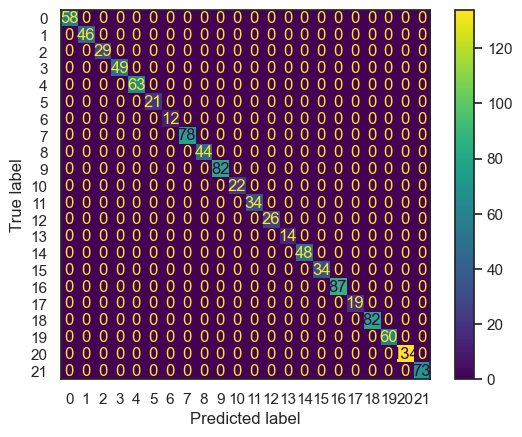

------TEST------
ACCURACY: 0.5591397849462365
RECALL: 0.5591397849462365
PRECISION: 0.5796857115405503


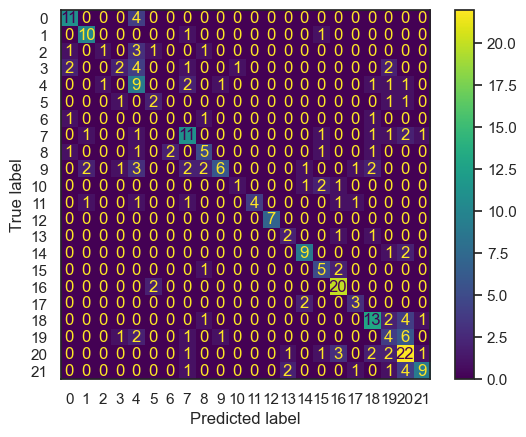

In [41]:
print("------TRAINING------")
confusion_plot(y_train,yp_train)
print("------TEST------")
confusion_plot(y_test,yp_test)

In [44]:
estimator = model.estimators_[0]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator,
                feature_names=X.columns,  
                class_names=Y.name,
                filled = True)

IndexError: string index out of range

### Visualize the Tree

In [24]:
# VISUALIZE THE DECISION TREE
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

regr = DecisionTreeRegressor(random_state=1234)
model = regr.fit(x_train, y_train)

def plot_tree(model, X, Y):
    fig = plt.figure(figsize=(25,20))
    _ = tree.plot_tree(model, 
                    feature_names=X.columns,  
                    class_names=Y.name,
                    filled=True)


In [25]:
plot_tree(model, X, Y)

Error in callback <function flush_figures at 0x000001E0B7B525F0> (for post_execute):


KeyboardInterrupt: 

### Hyperparameter Tuning

In [ ]:
# LOOP OVER POSSIBLE HYPER-PARAMETERS VALUES
test_results=[]
train_results=[]

for num_layer in range(1,51):
    model = tree.DecisionTreeClassifier(max_depth=num_layer)
    model = model.fit(x_train, y_train)

    yp_train=model.predict(x_train)
    yp_test=model.predict(x_test)

    # print(y_pred.shape)
    test_results.append([num_layer,accuracy_score(y_test, yp_test),recall_score(y_test, yp_test, average='weighted')])
    train_results.append([num_layer,accuracy_score(y_train, yp_train),recall_score(y_train, yp_train, average='weighted')])

In [ ]:
layers = [el[0] for el in test_results]
          
test_acc = [el[1] for el in test_results]
test_rec = [el[2] for el in test_results]

train_acc = [el[1] for el in train_results]
train_rec = [el[2] for el in train_results]

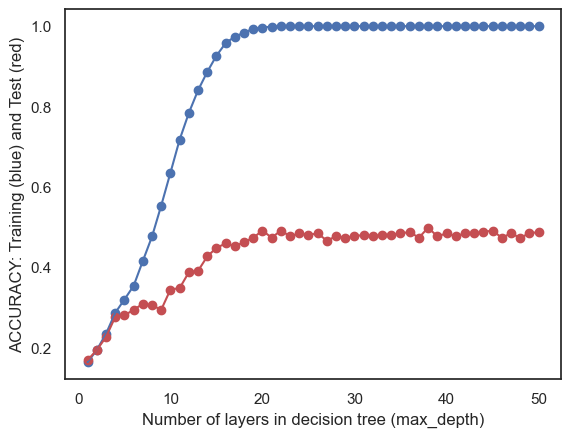

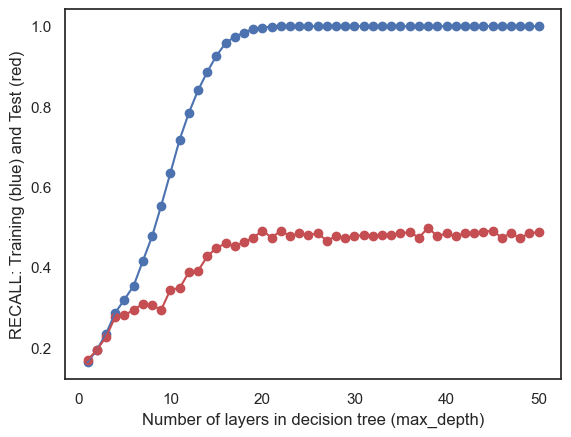

In [ ]:
# GENERATE PLOTS TO IDENTIFY OPTIMAL HYPERPARAMETER
def gen_plots(x, train, test):
    plt.plot(x,train, c='b')
    plt.scatter(x,train,c='b')
    plt.plot(x,test,c='r')
    plt.scatter(x,test,c='r')
    plt.xlabel("Number of layers in decision tree (max_depth)")
    plt.show();

plt.ylabel("ACCURACY: Training (blue) and Test (red)")
gen_plots(layers, train_acc, test_acc)
plt.ylabel("RECALL: Training (blue) and Test (red)")
gen_plots(layers, train_rec, test_rec)

### Find Optimal Hyperparameter

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
hyper_param=[]
train_error=[]
test_error=[]
for i in range(1,23):
    # INITIALIZE MODEL 
    model = DecisionTreeRegressor(max_depth=i)

    # TRAIN MODEL 
    model.fit(x_train,y_train)

    # OUTPUT PREDICTIONS FOR TRAINING AND TEST SET 
    yp_train = model.predict(x_train)
    yp_test = model.predict(x_test)

    # GET MAE
    err1=mean_absolute_error(y_train, yp_train) 
    err2=mean_absolute_error(y_test, yp_test) 

    hyper_param.append(i)
    train_error.append(err1)
    test_error.append(err2)

    print("hyperparam =",i)
    print(" train error:",err1)
    print(" test error:" ,err2)
    print(" error diff:" ,abs(err2-err1))

hyperparam = 1
 train error: 4.567054263998793
 test error: 4.638043269638497
 error diff: 0.07098900563970378
hyperparam = 2
 train error: 4.36699996713835
 test error: 4.399002621852473
 error diff: 0.032002654714123224
hyperparam = 3
 train error: 4.1081950124434785
 test error: 4.195498096404089
 error diff: 0.08730308396061037
hyperparam = 4
 train error: 3.901583499156248
 test error: 4.09030822197996
 error diff: 0.1887247228237121
hyperparam = 5
 train error: 3.699017264227789
 test error: 4.016347032129336
 error diff: 0.3173297679015472
hyperparam = 6
 train error: 3.388224496899457
 test error: 4.020143817819527
 error diff: 0.63191932092007
hyperparam = 7
 train error: 3.0473318270092693
 test error: 4.048013805418457
 error diff: 1.000681978409188
hyperparam = 8
 train error: 2.547296251422669
 test error: 3.7465245035983354
 error diff: 1.1992282521756663
hyperparam = 9
 train error: 2.1022123527832193
 test error: 3.82389999074346
 error diff: 1.7216876379602408
hyperpar

### Train Optimal Model

In [ ]:
#### TRAIN A SKLEARN DECISION TREE MODEL ON x_train,y_train 
model = tree.DecisionTreeClassifier(max_depth=4)
model = model.fit(x_train, y_train)

yp_train=model.predict(x_train)
yp_test=model.predict(x_test)

------TRAINING------
ACCURACY: 0.2860986547085202
RECALL: 0.2860986547085202
PRECISION: 0.28649374159874635


c:\Users\Eric\anaconda3\envs\ANLY501\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


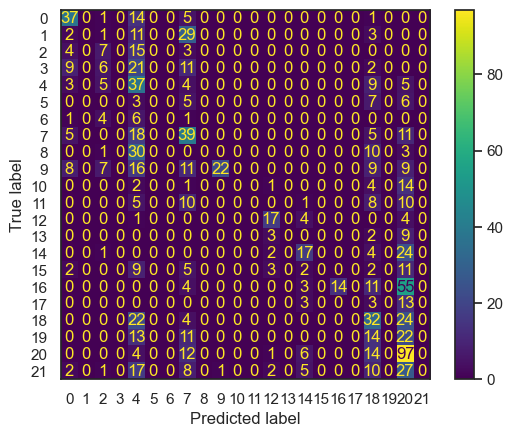

------TEST------
ACCURACY: 0.27598566308243727
RECALL: 0.27598566308243727
PRECISION: 0.27796544925072136


c:\Users\Eric\anaconda3\envs\ANLY501\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


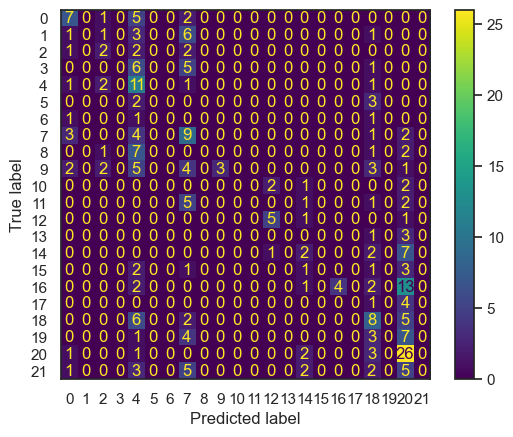

In [ ]:
print("------TRAINING------")
confusion_plot(y_train,yp_train)
print("------TEST------")
confusion_plot(y_test,yp_test)

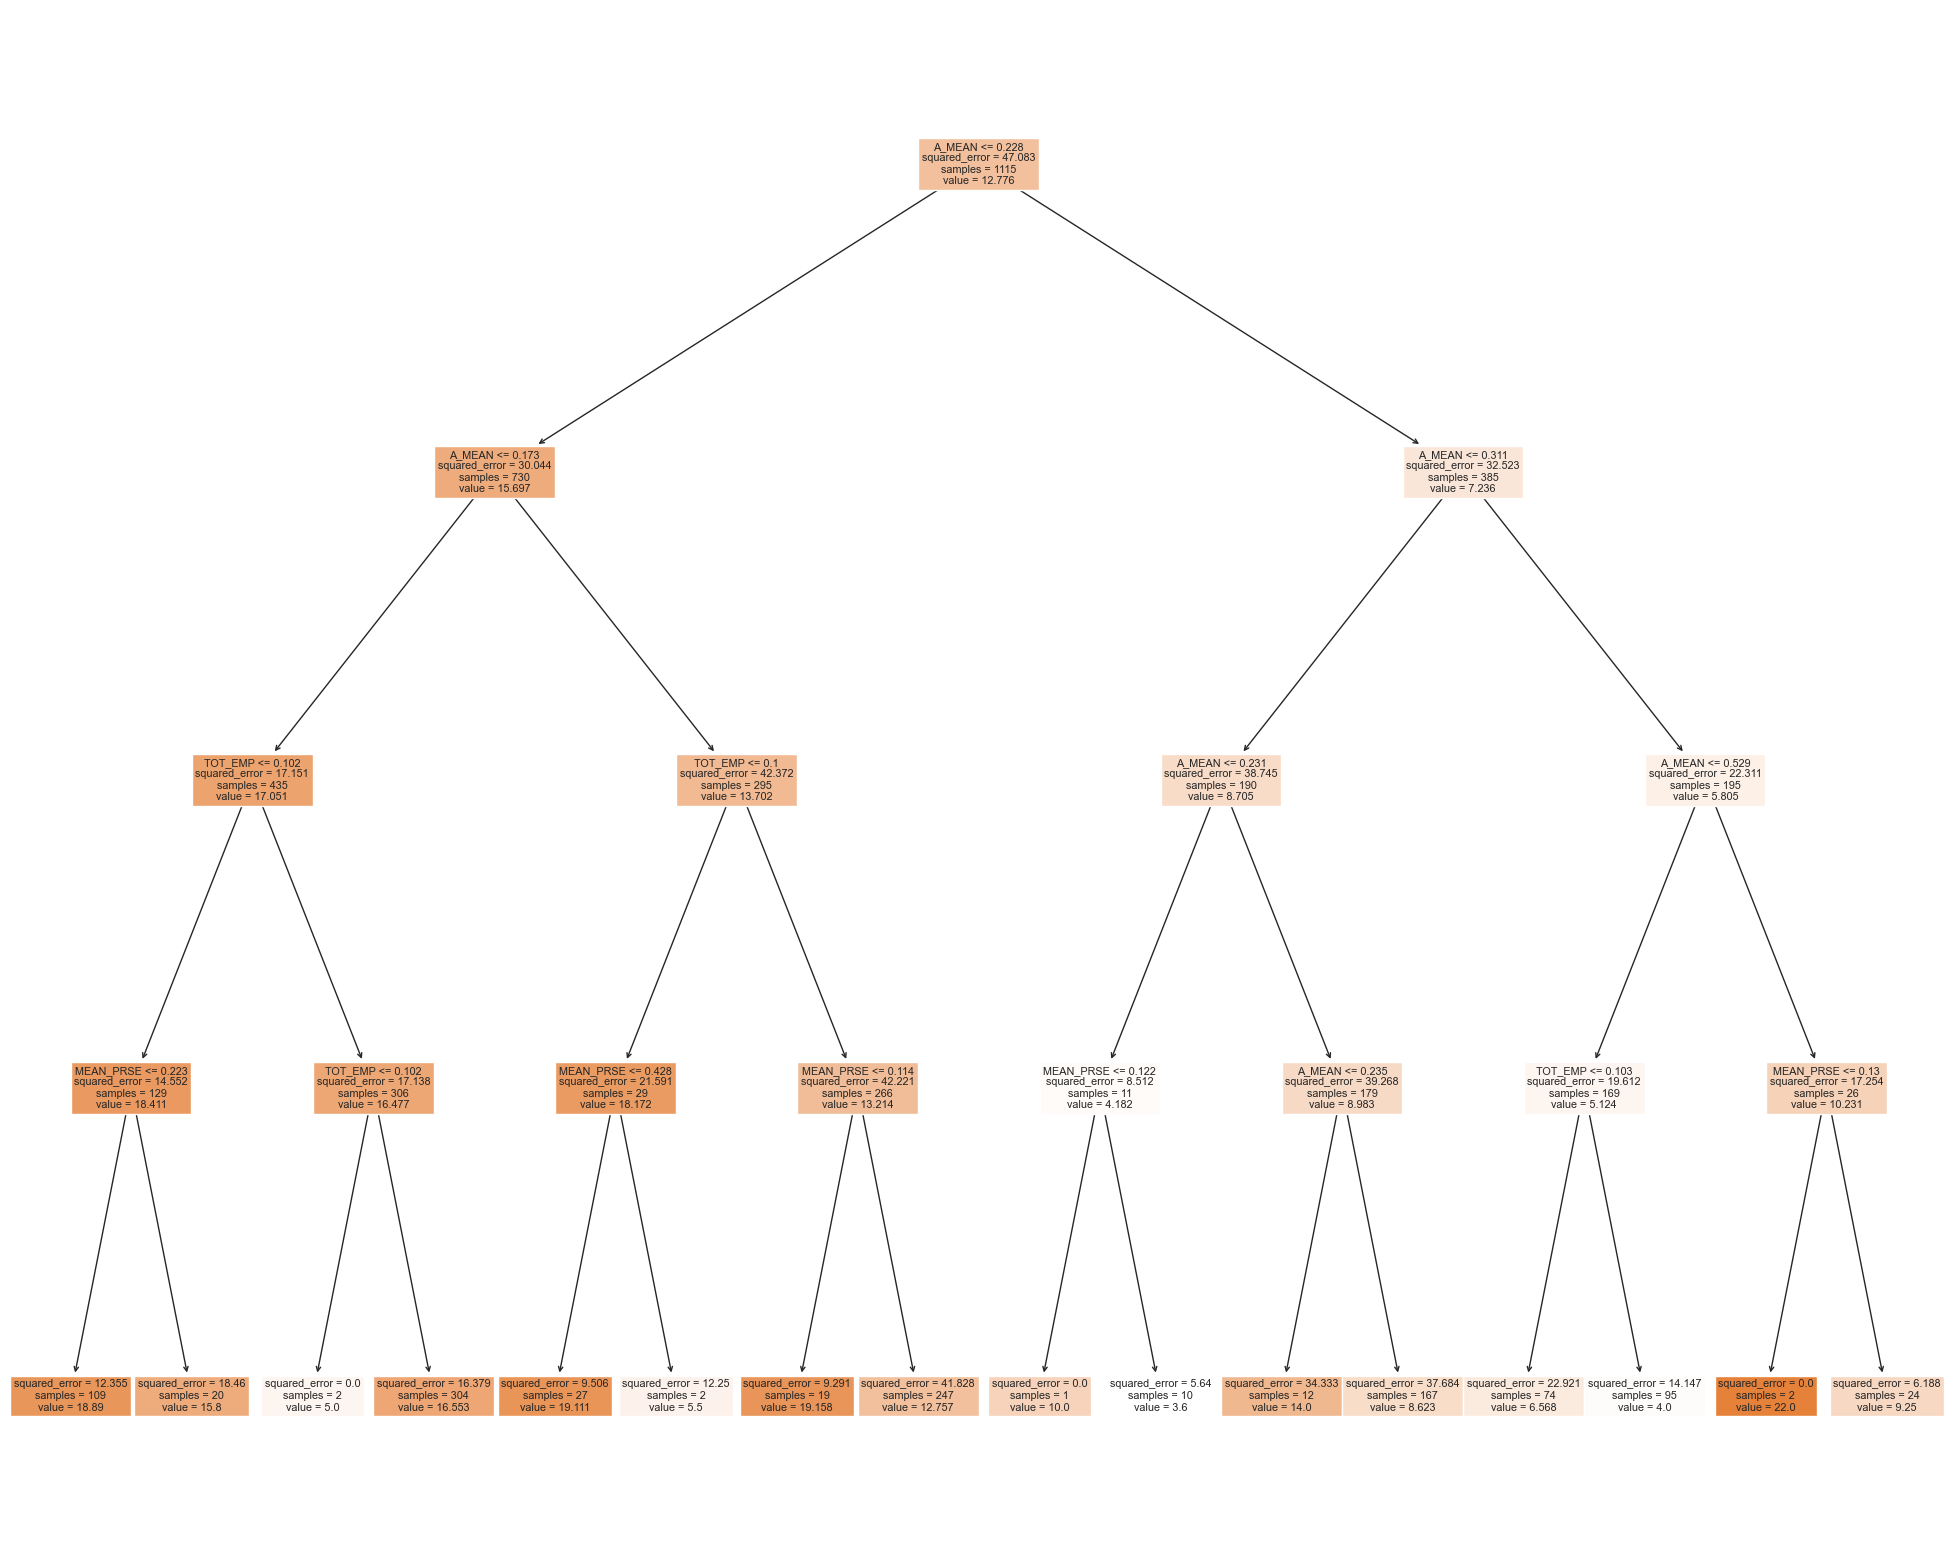

In [ ]:
# VISUALIZE THE DECISION TREE
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

regr = DecisionTreeRegressor(random_state=1234, max_depth=4)
model = regr.fit(x_train, y_train)

plot_tree(model, X, Y)